In [287]:
pwd

'd:\\pydatamining'

In [288]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [289]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [290]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [291]:
!pip install xlrd


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [292]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [293]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'



In [294]:
df = pd.read_excel("laporan1.xlsx")
celana = df.loc[df['itemName'] == '4pcs CELANA PENDEK ANAK UMUR 1-12 TAHUN MOTIF PRINTING']

In [295]:
celana['createTime'].min(), celana['createTime'].max()

(Timestamp('2021-10-25 12:01:00'), Timestamp('2023-12-15 22:16:00'))

In [296]:
cols = ['orderItemId','sellerSku', 'customerName', 'payMethod', 'billingAddr3', 'billingAddr4', 'billingAddr5', 'billingPhone', 'billingCountry', 'itemName', 'variation']
celana.drop(cols, axis=1, inplace=True)
celana = celana.sort_values('createTime')
celana.isnull().sum()

createTime    0
paidPrice     0
dtype: int64

In [297]:
celana = celana.groupby('createTime')['paidPrice'].sum().reset_index()

In [298]:
celana = celana.set_index('createTime')
celana.index

DatetimeIndex(['2021-10-25 12:01:00', '2021-11-03 11:55:00',
               '2021-11-03 13:09:00', '2021-11-03 21:12:00',
               '2021-11-09 08:25:00', '2021-11-13 05:00:00',
               '2021-11-13 09:37:00', '2021-11-15 12:32:00',
               '2021-11-17 17:21:00', '2021-11-17 17:22:00',
               ...
               '2023-10-26 21:29:00', '2023-11-09 19:07:00',
               '2023-11-12 05:42:00', '2023-11-21 13:56:00',
               '2023-11-22 13:12:00', '2023-11-26 15:18:00',
               '2023-11-27 08:48:00', '2023-12-10 05:29:00',
               '2023-12-12 10:49:00', '2023-12-15 22:16:00'],
              dtype='datetime64[ns]', name='createTime', length=678, freq=None)

In [299]:
y = celana['paidPrice'].resample('MS').mean()

<Axes: xlabel='createTime'>

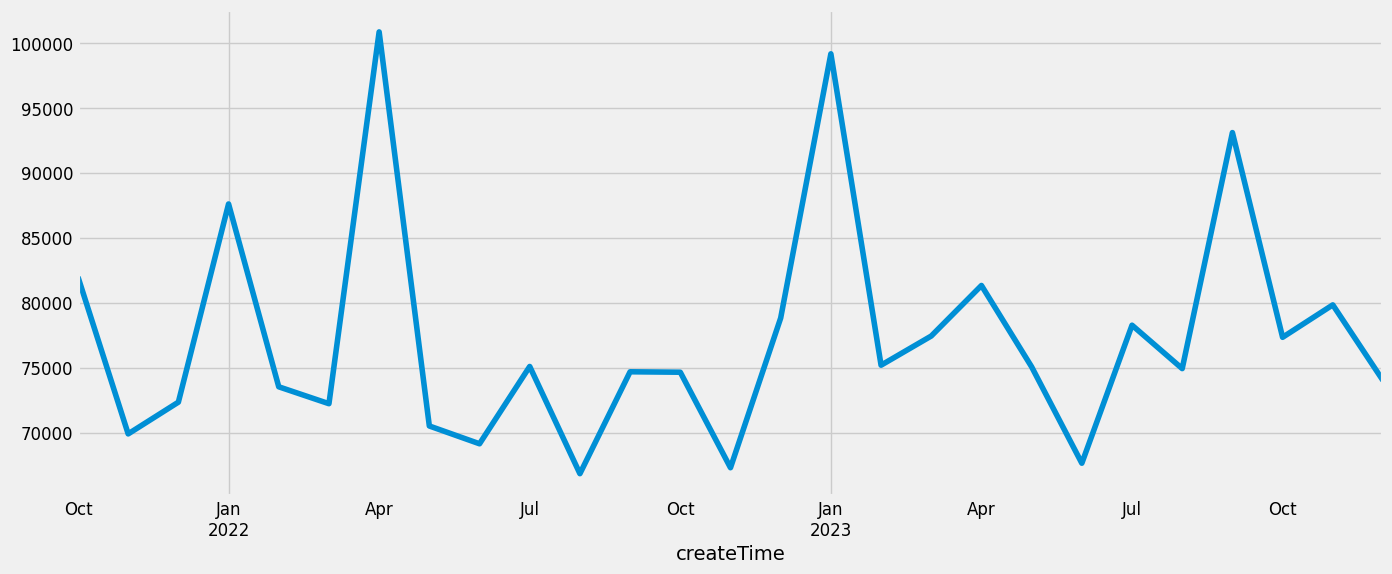

In [300]:
y.plot(figsize=(15, 6))

In [301]:
plt.show()

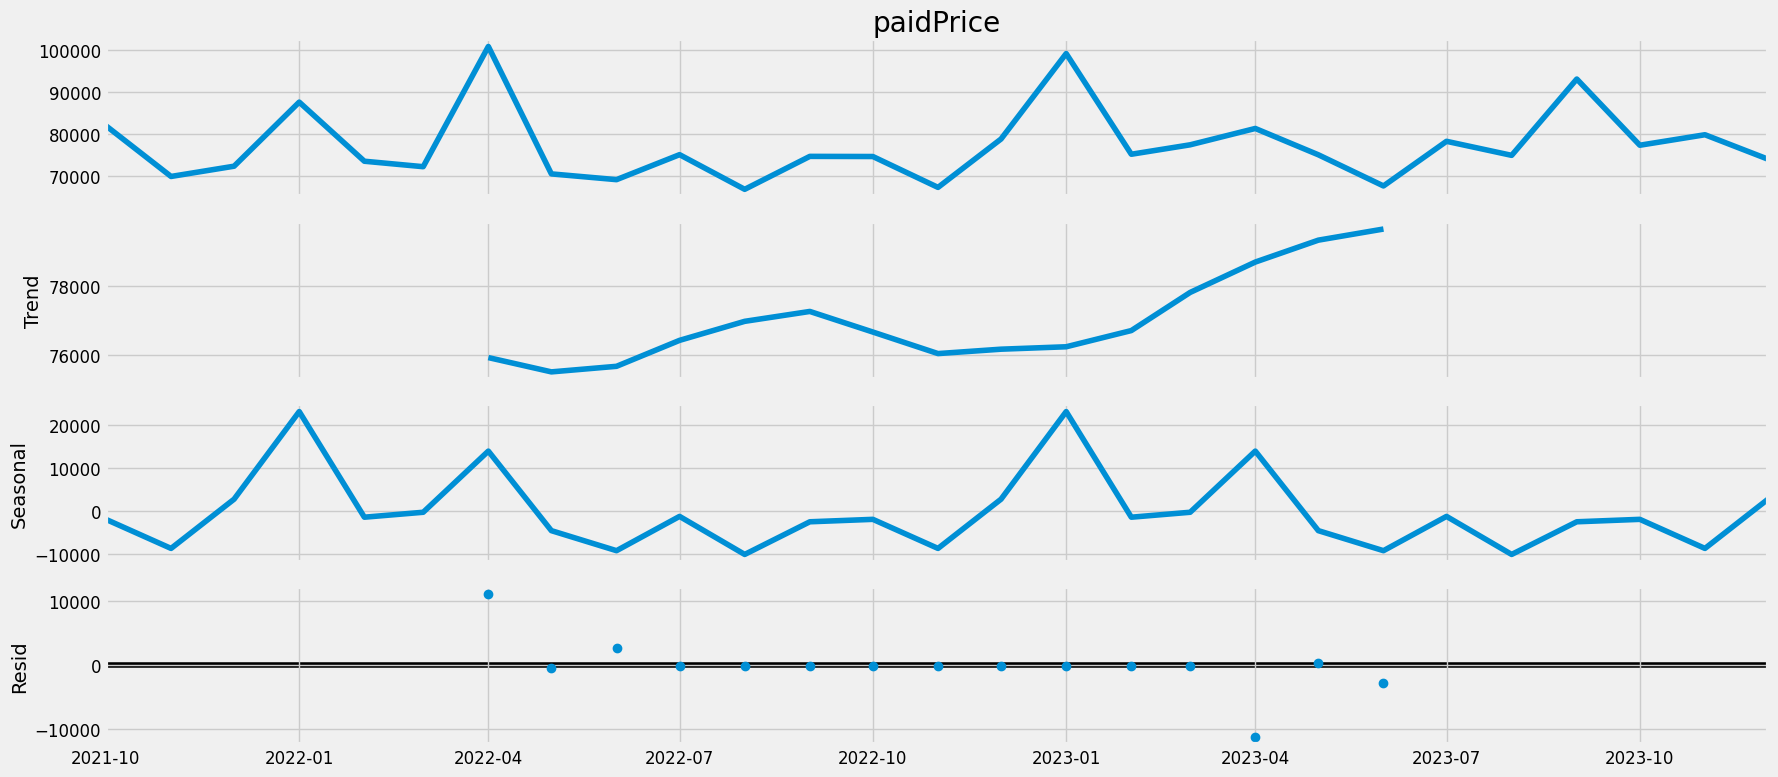

In [302]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [303]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [304]:
for param in pdq:
   for param_seasonal in seasonal_pdq:
      try:
        mod = sm.tsa.statespace.SARIMAX(y,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
        continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.3319856121307
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:444.3559598609487
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:297.78793111911386
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:46.31183068462566
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:319.7328028592165
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:300.53221776411425
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:65.02099286258473
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:45.901168553092425
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:621.1312479357886
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:323.9987968172011
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:279.43963092954743
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:26.202938947762373
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:371.5327358871167
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:324.813462656817
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:67.66921129441056
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:28.202931388493766
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:547.5534893628048
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:282.67640196400424
ARIM

In [305]:
mod = sm.tsa.statespace.SARIMAX(y,
                   order=(0, 1, 1),
                   seasonal_order=(0, 1, 1, 12),
                   enforce_stationarity=False,
                   enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6609        nan        nan        nan         nan         nan
ma.S.L12            0        nan        nan        nan         nan         nan
sigma2      1.619e+08        nan        nan        nan         nan         nan


In [306]:
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
           pred_ci.iloc[:, 0],
           pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1023-01-01, at position 0

In [ ]:
y_forecasted = pred.predicted_mean

In [ ]:
y_truth = y['2023-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 121551502.75


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 11025.04


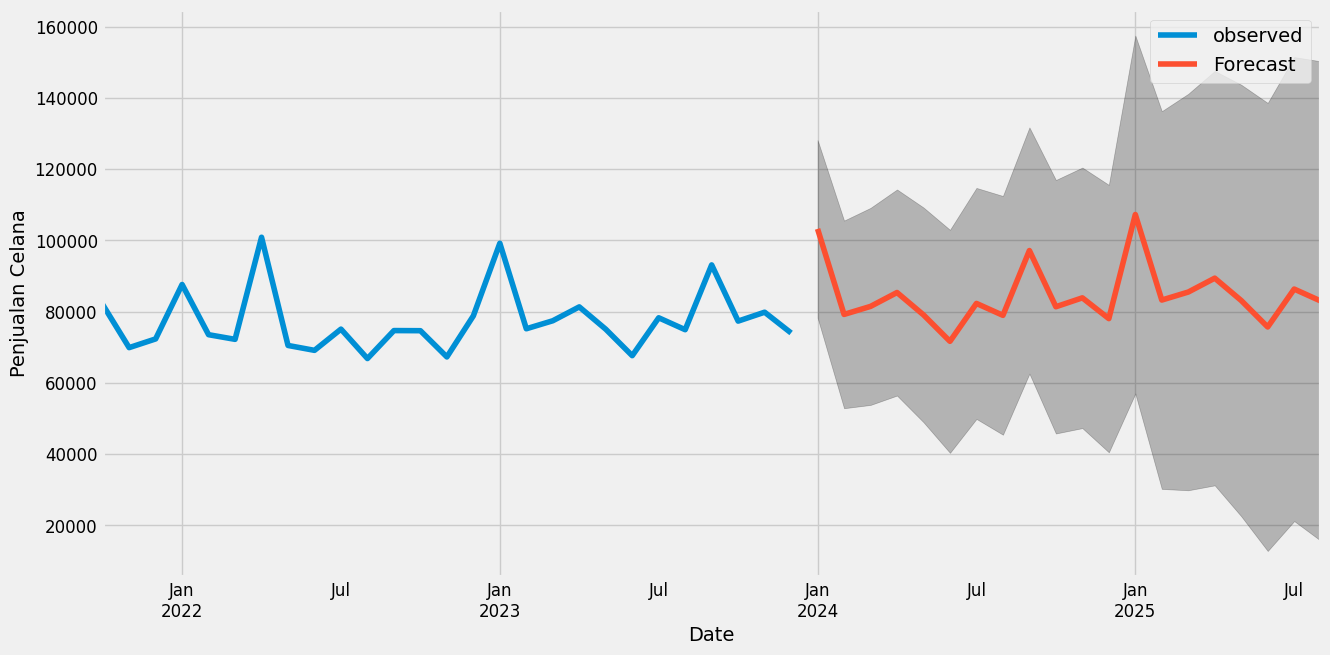

In [ ]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
           pred_ci.iloc[:, 0],
           pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Penjualan Celana')
plt.legend()
plt.show()

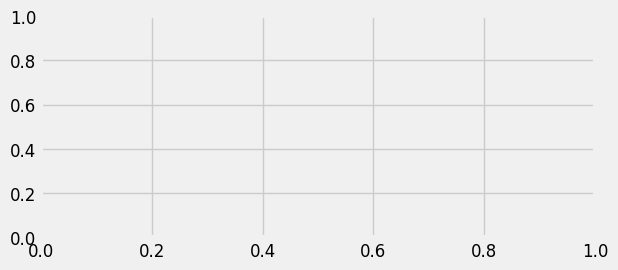

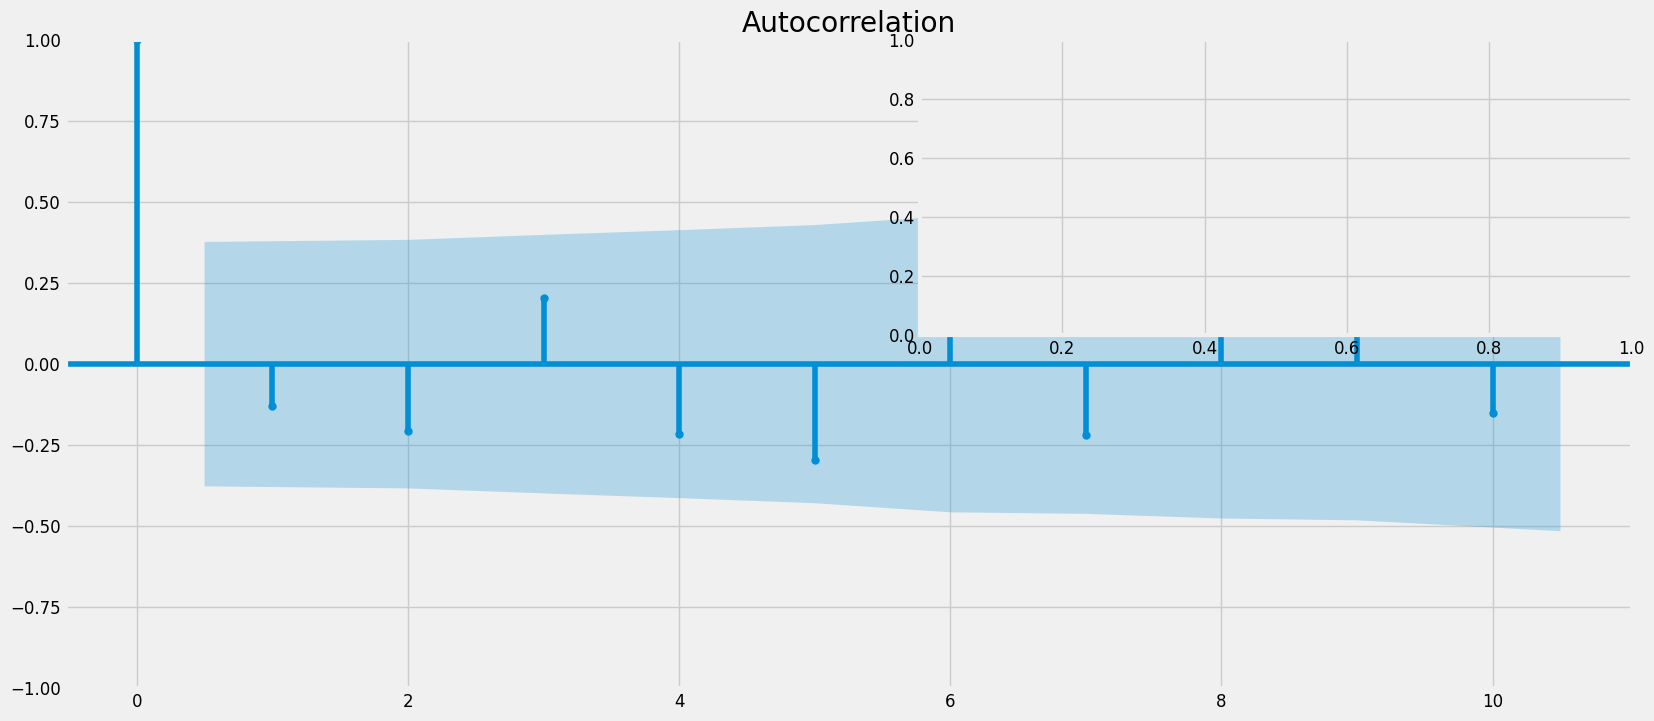

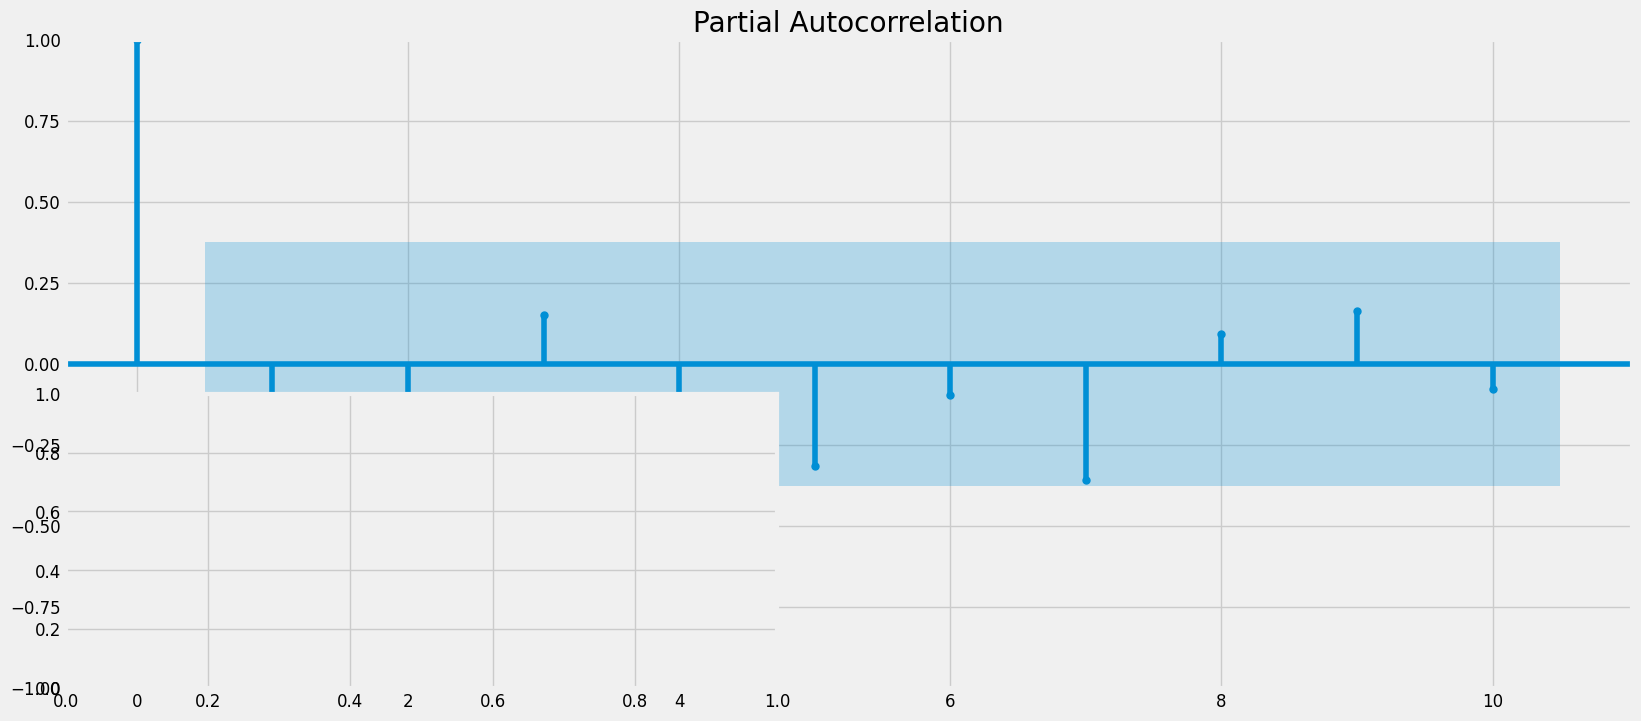

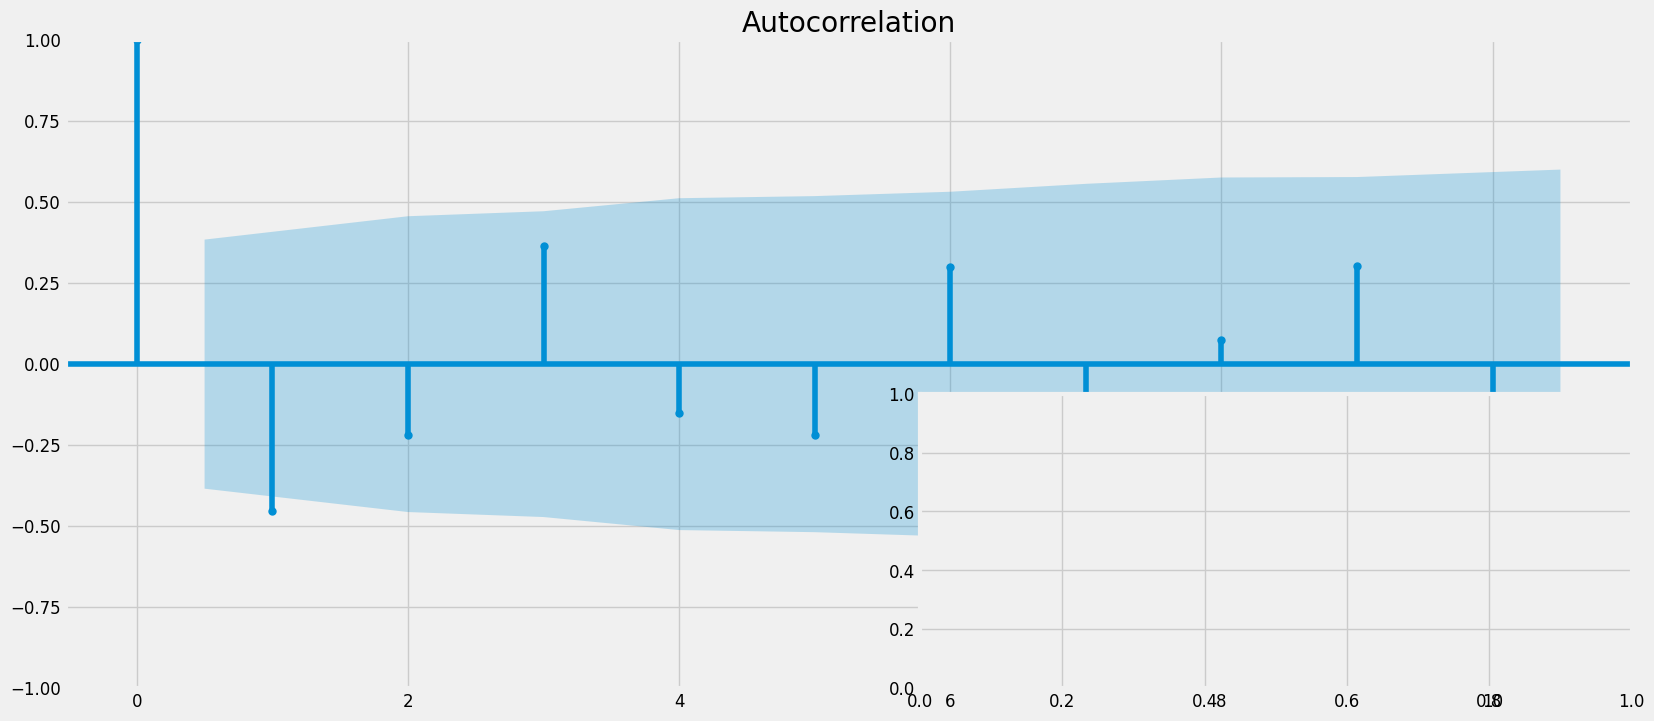

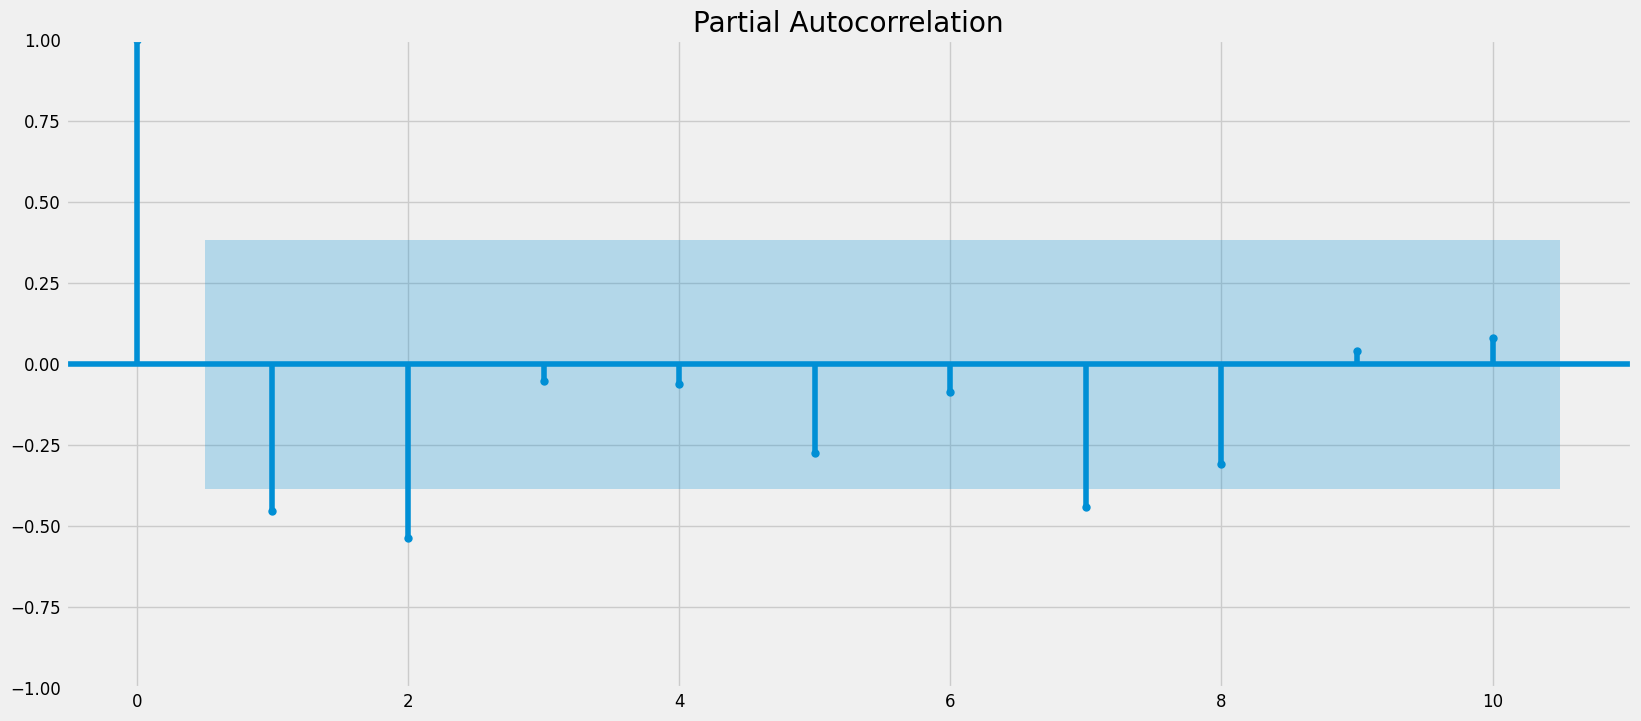

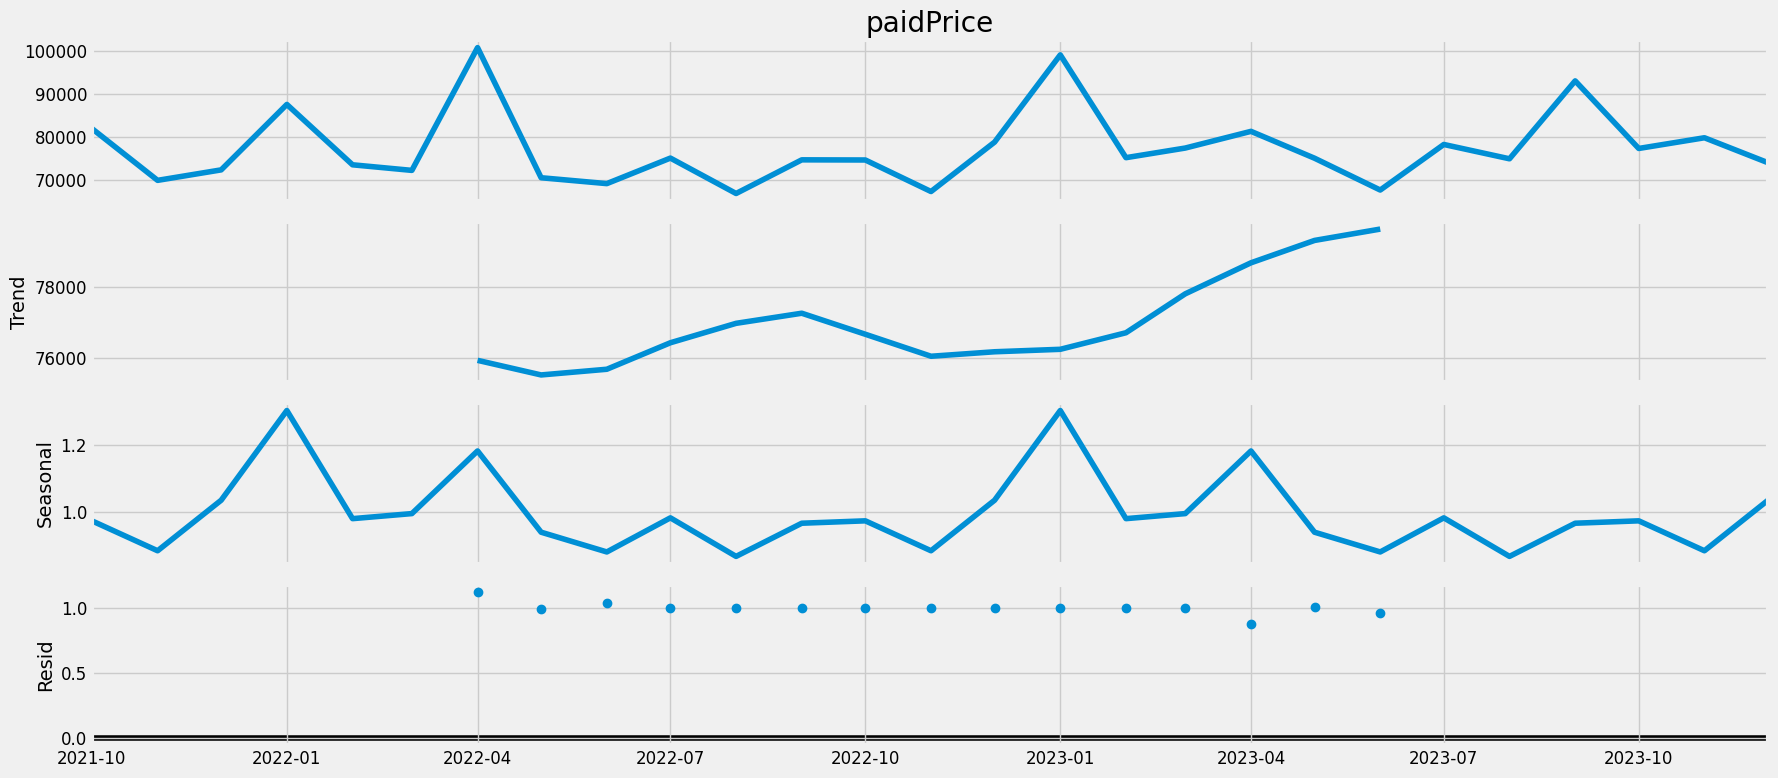

        ARIMA Seasonal_ARIMA         AIC
0   (0, 0, 0)  (0, 0, 0, 12)  661.331986
8   (0, 0, 1)  (0, 0, 0, 12)  621.131248
32  (1, 0, 0)  (0, 0, 0, 12)  570.878188
16  (0, 1, 0)  (0, 0, 0, 12)  547.553489
48  (1, 1, 0)  (0, 0, 0, 12)  543.507781
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.062e+09   9.84e+09      0.616      0.538   -1.32e+10    2.53e+10


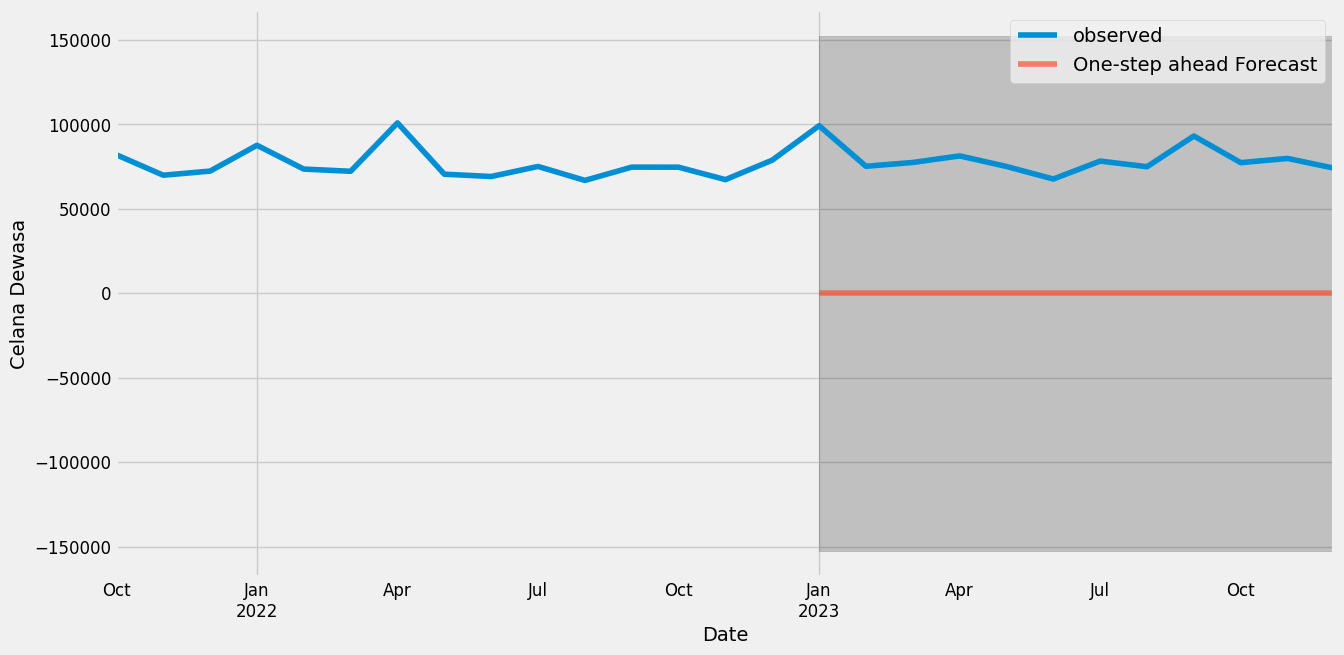

AttributeError: 'PredictionResults' object has no attribute 'predicted'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# load your dataset here
# y = df['sales']

# Plot ACF and PACF to select parameters for ARIMA
plt.figure(figsize=(14, 6))
plt.subplot(2, 2, 1)
plot_acf(y, lags=10)
plt.subplot(2, 2, 2)
plot_pacf(y, lags=10)
plt.subplot(2, 2, 3)
plot_acf(y.diff().dropna(), lags=10)
plt.subplot(2, 2, 4)
plot_pacf(y.diff().dropna(), lags=10)
plt.show()

# Seasonal Decomposition for ARIMA
seasonal_decompose(y, model='multiplicative').plot()
plt.show()

# AIC criteria to choose best model parameters
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            aic.append([param, param_seasonal, results.aic])
        except:
            continue

aic_df = pd.DataFrame(aic, columns=['ARIMA', 'Seasonal_ARIMA', 'AIC'])
print(aic_df.nlargest(5, 'AIC'))

# Based on the AIC criteria, we select the best model parameters
best_param = aic_df.nlargest(1, 'AIC')['ARIMA'].values[0]
best_seasonal_param = aic_df.nlargest(1, 'AIC')['Seasonal_ARIMA'].values[0]

# Fit the SARIMAX model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

# Forecasting
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
           pred_ci.iloc[:, 0],
           pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Celana Dewasa')
plt.legend()
plt.show()

# Error Calculation
y_forecasted = pred.predicted

In [ ]:
2021-10-25 12:01:00'), Timestamp('2023-12-15 22:16:00

In [314]:
def calculate_error(forecasted_values, actual_values):
    mse = mean_squared_error(actual_values, forecasted_values)
    mae = np.mean(np.abs(actual_values - forecasted_values))
    rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))
    r2 = r2_score(actual_values, forecasted_values)
    return mse, mae, rmse, r2

y_actual = y[y['2021-10-25 12:01:00'] >= '2022-01-01']
y_pred = y_forecasted[y_forecasted['2023-12-15 22:16:00'] >= '2024-01-01']

mse, mae, rmse, r2 = calculate_error(y_pred, y_actual)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

KeyError: '2021-10-25 12:01:00'